<a href="https://colab.research.google.com/github/DVN111/Data-Analyst-Portfolio/blob/main/Analisis%20Data%20Flipcart%20(Projek%20Personal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flipcart Data Analysis

Pada kesempatan kali ini, saya memposisikan diri sebagai seller yang ingin berjualan di sebuah platform. Karnanya, saya perlu untuk menganalisis berbagai hal terkait tujuan yang akan saya lakukan.

**# Problem Statement**

Masalah yang sedang saya hadapi ialah ingin mejadi seller pada platform ini. Namun saya masih bingung terkait kategori, subcategory dan produk apa yang paling laris dalam platform ini dan berapa harga terbaik untuk menjualnya.

**# Tujuan**

Karnanya, saya perlu tahu kategori apa yang paling populer, kemudian subcategory apa ang paling populer dalam kategori itu dan produk apa yang paling populer dan laris dari sub kategori itu beserta rata-rata harganya.

**# Data yang diperlukan**

Data terkait platform, yang berisi produk, brand, harga jual, harga, diskon dan rating. (anggap aku telah mendapatkannya).



**Keterangan Untuk Tiap Fitur Dataset**

Berikut adalah deskripsi untuk tiap kolom dalam data yang Anda berikan:

1. **Unnamed: 0**: Indeks baris dalam dataset

2. **_id**: Identifikasi unik untuk setiap produk, biasanya berupa UUID (Universal Unique Identifier) untuk membedakan produk satu sama lain.

3. **actual_price**: Harga asli produk sebelum diskon, menunjukkan nilai asli tanpa potongan harga.

4. **average_rating**: Rating rata-rata produk berdasarkan ulasan pelanggan, biasanya diukur dalam skala 1 hingga 5.

5. **brand**: Merek produk

6. **category**: Kategori utama produk, mengelompokkan produk dalam kategori besar seperti 'Clothing and Accessories'.

7. **crawled_at**: Tanggal dan waktu data produk diambil dari sumber, menunjukkan kapan informasi tersebut diperoleh.

8. **description**: Deskripsi singkat produk, memberikan informasi rinci tentang produk termasuk fitur dan manfaatnya.

9. **discount**: Persentase diskon yang diterapkan pada harga produk, menunjukkan seberapa besar potongan harga yang diberikan.

10. **images**: URL gambar produk, memberikan tautan ke gambar visual produk yang sering kali digunakan dalam daftar produk online.

11. **out_of_stock**: Status ketersediaan produk, menunjukkan apakah produk saat ini tersedia atau tidak (True = Habis, False = Tersedia).

12. **pid**: Kode identifikasi produk, sering kali berupa SKU (Stock Keeping Unit) atau ID unik yang digunakan oleh penjual.

13. **product_details**: Detail tambahan tentang produk, sering kali berupa struktur data JSON yang berisi informasi seperti kode gaya, jenis penutupan, dan fitur khusus lainnya.

14. **seller**: Nama penjual atau toko yang menawarkan produk, memberikan informasi tentang pihak yang menjual produk.

15. **selling_price**: Harga jual produk setelah diskon, menunjukkan harga akhir yang harus dibayar oleh pelanggan.

16. **sub_category**: Subkategori produk, memberikan detail tambahan tentang jenis produk dalam kategori besar (misalnya, 'Bottomwear' di bawah 'Clothing and Accessories').

17. **title**: Judul atau nama produk, sering kali mencakup nama dan beberapa detail singkat untuk mengidentifikasi produk.

18. **url**: Tautan ke halaman produk di situs web penjual, memungkinkan akses langsung ke halaman produk untuk informasi lebih lanjut atau pembelian.

Dari data diatas kita sudah mendapatkan data yang mungkin untuk kita pakai dalam analisis yaitu

*actual_price,	average_rating,	brand	category,	discount,	out_of_stock,	product_details,	seller,	selling_price,	sub_category dan title*

Kita akan menggunakan kolom ini saja untuk analisis selanjutnya

## Set Up Environment

In [1]:
# Setup Kaggle API credentials
import os
import shutil

import warnings
warnings.filterwarnings('ignore')


# Set environment variables
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

## 1. Collecting Dataset

In [2]:
# Check if the setup was successful
import zipfile
import subprocess

def DatasetImporter(source):
    # Membagi sumber untuk mendapatkan nama dataset
    dataset_name = source.split('/')[-1]

    # Mengunduh dataset dari Kaggle
    download_command = f"kaggle datasets download -d {source}"

    subprocess.run(download_command, shell=True, check=True)

    # Mengekstrak file zip
    zip_file = f"{dataset_name}.zip"
    if os.path.exists(zip_file):
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall('dataset')
        print(f"Dataset telah diekstrak ke folder 'dataset'")
    else:
        print(f"File {zip_file} tidak ditemukan.")

# Panggil fungsi dengan path dataset dari Kaggle
DatasetImporter("aaditshukla/flipkart-fasion-products-dataset")


Dataset telah diekstrak ke folder 'dataset'


## 2. Understanding & Cleaning Dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_main = pd.read_excel('/content/dataset/output.xlsx')

In [5]:
df = df_main.copy()

Dari sini, kita mengetahui bahwa dataset ini memiliki total 30.000 baris data dan 18 kolom fitur. Dari kedelapanbelas kolom, terdapat kolom yang merupakan kategorikal (_category_, _subcategory_ & _out_of_stock_), kolom numerik (_actual_price_, _selling_price_, _rating_ & _discount_) dan beberapa data tambahan seperti kolom *brand* dan *title*. Beberapa kolom inilah yang akan kita pakai untuk analisis.

Disini kita juga meenemukan bahwa penamaan dari tiap kolom ada yang salah, seperti pada kolom *discount* dan *description* yang terbalik. Maka dari itu kita perlu memperbaikinya terlebih dahulu.



In [6]:
# Tukar nama kolom antara discount dan description dan seleksi kolom yang dibutuhkan saja
df = df.rename(columns={'discount':'description', 'description':'discount'})
df = df[['actual_price', 'selling_price', 'discount', 'average_rating', 'brand', 'category', 'sub_category', 'out_of_stock', 'title']]
df.head(1)

,actual_price,selling_price,discount,average_rating,brand,category,sub_category,out_of_stock,title
0,"2,999",921,69% off,3.9,York,Clothing and Accessories,Bottomwear,False,Solid Men Multicolor Track Pants


Oke, sekarang penamaanya sudah benar dan dataframe kita sudah diersihkan dari kolom yang tidak dibutuhkan. Selanjutnya memastikan tipe data dari tiap kolom sesuai dengan yang kita butuhkan, mengecek nilai null, nilai yang memiliki duplikasi dan menentukan kolom kategorikal dan numerik.

In [7]:
types = df.dtypes
missing_values = df.isnull().sum()
duplicated_rows = df.duplicated().sum()
unique_values = df.nunique()

data_summary = pd.DataFrame({
    "Data Types": types,
    "Missing values": missing_values,
    "Duplicated values": duplicated_rows,
    "Unique values": unique_values
})

data_summary['Categorical'] = (unique_values <= 24) # conditon, true and false
cat_var = []
for cat in data_summary[data_summary['Categorical']== True].index.tolist():
  cat_var.append(cat)
print(f'Kolom kategorikal: {cat_var}\n')
data_summary

Kolom kategorikal: ['category', 'sub_category', 'out_of_stock']



,Data Types,Missing values,Duplicated values,Unique values,Categorical
actual_price,object,863,12882,728,False
selling_price,object,2,12882,1512,False
discount,object,941,12882,87,False
average_rating,float64,2446,12882,38,False
brand,object,2068,12882,324,False
category,object,0,12882,4,True
sub_category,object,0,12882,24,True
out_of_stock,bool,0,12882,2,True
title,object,0,12882,4579,False


Dari info ini, kita mengetahui bahwa ada kolom yang memiliki tipe data yang tidak sesuai seperti *actual_price*, *selling_price* dan *discount* yang bertipe data object padahal seharusnya bertipe data float. Kita juga mendapat informasi tambahan mengenai adanya nilai *null* pada 5 kolom teratas. Nilai unik diatas juga kita gunakan untuk memastikan apakah kolom itu termasuk kategorikal ataukah numerik.

Sebelum melakukan konversi tipe data, kita perlu memastikan bahwa tidak terdapat nilai null dan semua datanya sesuai dan kompatibel dengan format yang kita ingin konversi. Dapat dilihat pada kolom discount, datanya masih memiliki "% off" setelah angka dan penggunaan "," pada selling dan actual price yang akan membuat kita mengalami error.

In [8]:
df.dropna(inplace=True) # menghapus nilai duplikat
df['discount'] = df['discount'].str.replace('% off', '').astype(int) # memastikan bahwa hanya angka
df['actual_price'] = df['actual_price'].str.replace(',', '.').astype(float) # memastikan bahwa menggunakan "."
df['selling_price'] = df['selling_price'].str.replace(',', '').astype(float) # memastikan bahwa menggunakan "."
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25177 entries, 0 to 29998
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   actual_price    25177 non-null  float64
 1   selling_price   25177 non-null  float64
 2   discount        25177 non-null  int64  
 3   average_rating  25177 non-null  float64
 4   brand           25177 non-null  object 
 5   category        25177 non-null  object 
 6   sub_category    25177 non-null  object 
 7   out_of_stock    25177 non-null  bool   
 8   title           25177 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 1.8+ MB


Semua datanya sudah bersih dari nilai Null dan tipe data setiap kolom sudah sesuai. sekarang waktunya untuk masuk ketahap analisis data.

## 3. Data Analysis

### Explorasi fitur kategorikal
Karna kita ingin tahu seberapa populer sebuah kategori, subcategory dan produk ang ada diplatform, maka kita perlu tahu seberapa banyak frekuensi produk, kategori dan subkategori dalam platform ini.

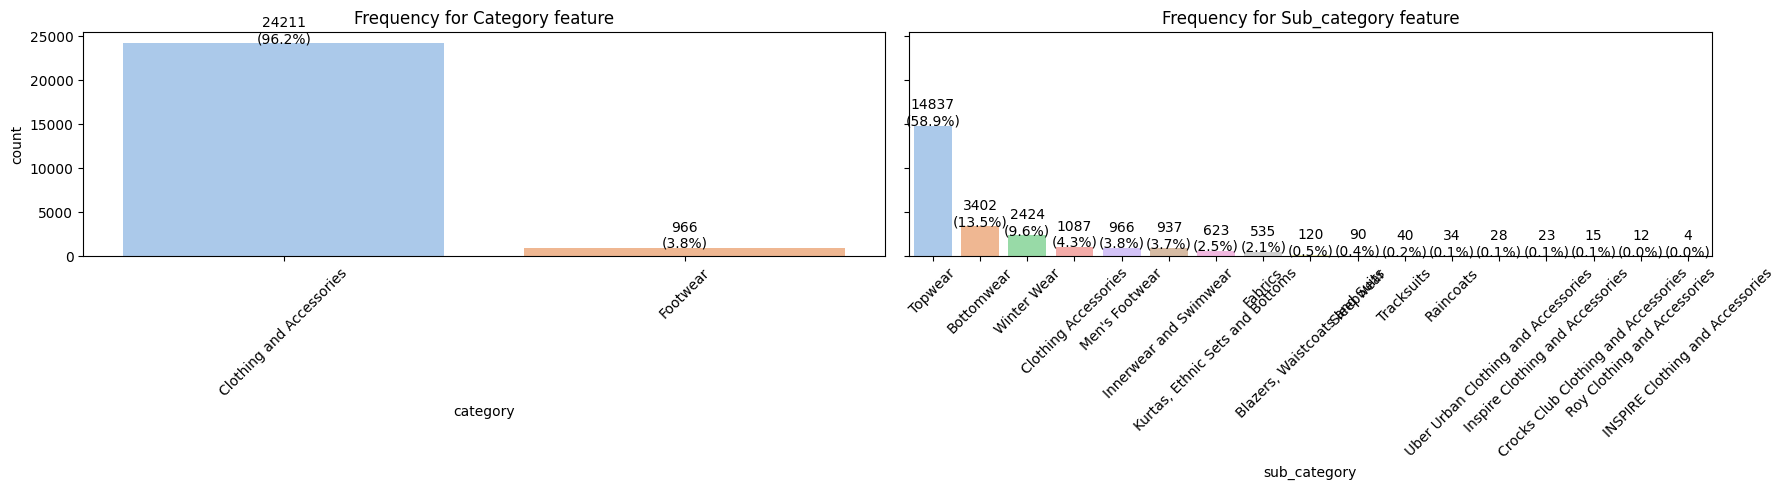

In [9]:
categorical_features = ['category', 'sub_category']

fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

for i, feature in enumerate(categorical_features):
    ax = axes[i]
    sns.countplot(x=feature, data=df, palette='pastel', order=df[feature].value_counts().index, ax=ax)
    ax.set_title(f'Frequency for {feature.capitalize()} feature')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Menghitung total jumlah data untuk menghitung persentase
    total = len(df)

    for p in ax.patches:
        height = p.get_height()
        percentage = 100 * height / total  # Menghitung persentase
        ax.text(p.get_x() + p.get_width() / 2, height, f'{int(height)}\n({percentage:.1f}%)', ha='center')  # Menampilkan nilai dan persentase

plt.tight_layout()
plt.show()


**Insights:**
- **kategori yang paling populer ialah kategori *Clothing and Accessories* sebanyak 24.211(96,2%)** dari total produk yang ada di platform dan sisanya adalah kategori footwear dengan 966(3,8%) produk.
- ***subcategory* paling populer ialah *topwear* sebanyak 14.837(58,9%)** produk, kemudian botomwear 3402(13.5%), winterwear 2424(9,6%) dll

selanjutnya, kita juga ingin tahu brand dan produk apa saja yang paling populer dari subcategory topwear.

### Analisis produk berdasarkan kepopuleran

In [10]:
# prompt: buat top 10 produk dengan count terbanyak dari 10 brand dengan count terbanyak
# buat kode ini untuk kategori 'Topwear', 'Bottomwear', dan 'Winter Wear'

# Top 10 produk dari 10 brand teratas untuk setiap kategori
for category in ['Topwear', 'Bottomwear', 'Winter Wear']:
  print(f"Kategori: {category}\n")
  # Filter dataframe berdasarkan kategori
  df_category = df[df['sub_category'] == category]

  # Top 10 brand dalam kategori ini
  top_10_brands = df_category['brand'].value_counts().nlargest(10).index.tolist()

  # Top 10 produk untuk setiap brand dalam top 10
  for brand in top_10_brands:
    df_brand = df_category[df_category['brand'] == brand]
    top_10_products = df_brand['title'].value_counts().nlargest(3)
    print(f"Top 10 produk untuk brand {brand}:\n{top_10_products}\n")


Kategori: Topwear

Top 10 produk untuk brand ARBO:
title
Color Block Men Polo Neck Dark Blue, Yellow, Beige T-Shirt    51
Solid Men Collared Neck Black T-Shirt                         34
Solid Men Polo Neck Black T-Shirt                             33
Name: count, dtype: int64

Top 10 produk untuk brand Keo:
title
Printed Men Round Neck White T-Shirt         174
Printed Men Round Neck Yellow T-Shirt         80
Printed Men Round Neck Multicolor T-Shirt     54
Name: count, dtype: int64

Top 10 produk untuk brand ECKO Unl:
title
Men Slim Fit Checkered Cut Away Collar Casual Shirt    239
Men Slim Fit Checkered Casual Shirt                     66
Men Slim Fit Solid Cut Away Collar Casual Shirt         44
Name: count, dtype: int64

Top 10 produk untuk brand Amp:
title
Color Block Men Round Neck Multicolor T-Shirt  (Pack of 2)             120
Printed, Color Block Men Round Neck Multicolor T-Shirt  (Pack of 3)     42
Solid Men Round Neck Multicolor T-Shirt  (Pack of 2)                    34
Na

**Insights:**
- Produk terpopuler dari subcategory topwear ialah **Men Slim Fit Checkered Cut Away Collar Casual Shirt** yang dirilis oleh brand ecko unl sebanyak 239 produk.
- Produk terpopuler dari subcategory winterwear ialah **Full Sleeve Graphic Print Men Sweatshirt** dari brand Free Authori sebanyak 168 produk.
- Produk terpopuler dari subcategory bottomwear ialah **Slim Fit Men Multicolor Cotton Blend Trousers** dari brand Uber Urb sebanyak 90 produk.


### Analisis produk berdasarkan kelarisan

In [11]:
# prompt: dari top 10 title dari top 10 brand. aku ingin tahu title mana saja yang memiliki count terbanyak dan memilki nilai out_of_stock= true terbanyak dan print brand,title beserta berpa jumlah barang yang out_of_stock=true

# Dictionary untuk menyimpan jumlah out_of_stock=True untuk setiap judul
out_of_stock_counts = {}

# Loop melalui setiap kategori
for category in ['Topwear', 'Bottomwear', 'Winter Wear']:
  # Filter dataframe berdasarkan kategori
  df_category = df[df['sub_category'] == category]

  # Top 10 brand dalam kategori ini
  top_10_brands = df_category['brand'].value_counts().nlargest(10).index.tolist()

  # Loop melalui setiap brand
  for brand in top_10_brands:
    df_brand = df_category[df_category['brand'] == brand]
    top_10_products = df_brand['title'].value_counts().nlargest(3).index.tolist()

    # Loop melalui setiap judul produk
    for title in top_10_products:
      # Hitung jumlah out_of_stock=True untuk judul ini
      count = df_brand[(df_brand['title'] == title) & (df_brand['out_of_stock'] == True)]['title'].count()

      # Simpan jumlah dalam dictionary
      out_of_stock_counts[(brand, title)] = count

# Urutkan dictionary berdasarkan jumlah out_of_stock=True (terbesar ke terkecil)
sorted_counts = sorted(out_of_stock_counts.items(), key=lambda x: x[1], reverse=True)

# Print hasil
print("Brand, Title, dan Jumlah Out of Stock (True):\n")
for (brand, title), count in sorted_counts:
  if count > 0:
    print(f"Brand: {brand}, Title: {title}, Out of Stock (True): {count}")


Brand, Title, dan Jumlah Out of Stock (True):

Brand: JACK AND HAR, Title: Full Sleeve Solid Men Casual Jacket, Out of Stock (True): 11
Brand: REEB, Title: Full Sleeve Solid Men Sweatshirt, Out of Stock (True): 9
Brand: Pu, Title: Full Sleeve Printed Men Sweatshirt, Out of Stock (True): 8
Brand: JACK AND HAR, Title: Full Sleeve Striped Men Casual Jacket, Out of Stock (True): 8
Brand: PixF, Title: Printed Men Round Neck Black T-Shirt, Out of Stock (True): 6
Brand: Pu, Title: Solid Men Black Track Pants, Out of Stock (True): 5
Brand: Mett, Title: Sleeveless Solid Men Puffer Jacket, Out of Stock (True): 5
Brand: VOXA, Title: Full Sleeve Solid Men Denim Jacket, Out of Stock (True): 5
Brand: Pu, Title: Printed Men Round Neck White T-Shirt, Out of Stock (True): 4
Brand: REEB, Title: Solid Men Black Track Pants, Out of Stock (True): 4
Brand: Pu, Title: Full Sleeve Solid Men Sweatshirt, Out of Stock (True): 4
Brand: M7 By Metrona, Title: Full Sleeve Solid Men Sports Jacket, Out of Stock (True)

**Insight:**

- Hasil analisis ke larisan sebuah produk, ***Full Sleeve Solid Men Casual Jacket*** dari brand ***JACK AND HAR*** adalah produk yang paling banyak dibeli, hal ini dapat dilihat dari banyaknya produk yang habis (11 produk). Selanjutnya ***Full Sleeve Solid Men Sweatshirt*** dari brand _REEB_ dan ***Full Sleeve Printed Men Sweatshirt*** dari brand ***Pu***


Sampai sini kita sudah tahu produk apa saja yang paling laris dari 3 subcategory terpopuler. Selanjutnya ialah menganalisis strategi terkait penjualannya seperti **menentukan harga jual dan diskon** yang akan diberikan.

### Analisis Harga Jual

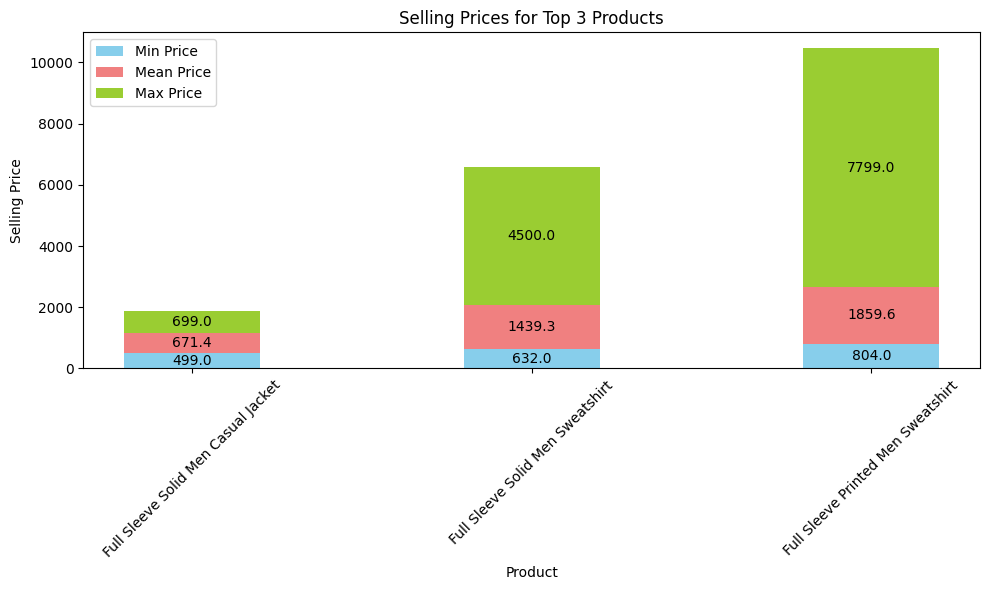

In [12]:
# Ambil 3 produk teratas
top_3_products = sorted_counts[:3]

# Buat list untuk menyimpan data harga jual
brands = []
titles = []
min_prices = []
mean_prices = []
max_prices = []

# Loop melalui 3 produk teratas
for (brand, title), _ in top_3_products:
    # Filter dataframe untuk produk tertentu
    df_product = df[(df['brand'] == brand) & (df['title'] == title)]

    # Hitung harga jual minimum, rata-rata, dan maksimum
    min_price = df_product['selling_price'].min()
    mean_price = df_product['selling_price'].mean()
    max_price = df_product['selling_price'].max()

    # Tambahkan data ke list
    brands.append(brand)
    titles.append(title)
    min_prices.append(min_price)
    mean_prices.append(mean_price)
    max_prices.append(max_price)

# Buat DataFrame dari data harga jual
df_prices = pd.DataFrame({
    'Brand': brands,
    'Title': titles,
    'Min Price': min_prices,
    'Mean Price': mean_prices,
    'Max Price': max_prices
})
df_prices

# Asumsikan df_prices sudah ada
df_prices = pd.DataFrame({
    'Brand': brands,
    'Title': titles,
    'Min Price': min_prices,
    'Mean Price': mean_prices,
    'Max Price': max_prices
})

# Set ukuran plot
plt.figure(figsize=(10, 6))

# Plot stacked bar chart
bar_width = 0.4  # Lebar bar
index = range(len(df_prices))

# Plot setiap bar untuk Min, Mean, Max Price
plt.bar(index, df_prices['Min Price'], bar_width, label='Min Price', color='skyblue')
plt.bar(index, df_prices['Mean Price'], bar_width, bottom=df_prices['Min Price'], label='Mean Price', color='lightcoral')
plt.bar(index, df_prices['Max Price'], bar_width, bottom=df_prices['Min Price'] + df_prices['Mean Price'], label='Max Price', color='yellowgreen')

# Menambahkan keterangan nilai di setiap bar
for i, (min_val, mean_val, max_val) in enumerate(zip(df_prices['Min Price'], df_prices['Mean Price'], df_prices['Max Price'])):
    plt.text(i, min_val / 2, f'{min_val:.1f}', ha='center', va='center', color='black')
    plt.text(i, min_val + mean_val / 2, f'{mean_val:.1f}', ha='center', va='center', color='black')
    plt.text(i, min_val + mean_val + max_val / 2, f'{max_val:.1f}', ha='center', va='center', color='black')

# Tambahkan label dan judul
plt.xlabel('Product')
plt.ylabel('Selling Price')
plt.title('Selling Prices for Top 3 Products')
plt.xticks(index, df_prices['Title'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


**Insights:**
- rata-rata seller menjual Full sleve solid men casual jacket dengan harga 671.4, harga terendah 499 dan harga tertingginya di 699
- Untuk produk full sleeve solid men sweatshirt, rata-rata seller menjualnya di harga 1439.3, harga terendah 632 dan harga tertingginya di 4500.
- Dan untuk full sleeve printed men sweatshirt, rata-rat seller menjualnya di harga 1859.6, harga terendahnya 804 dan harga tertingginya ialah 7799.

### Analisis Diskon

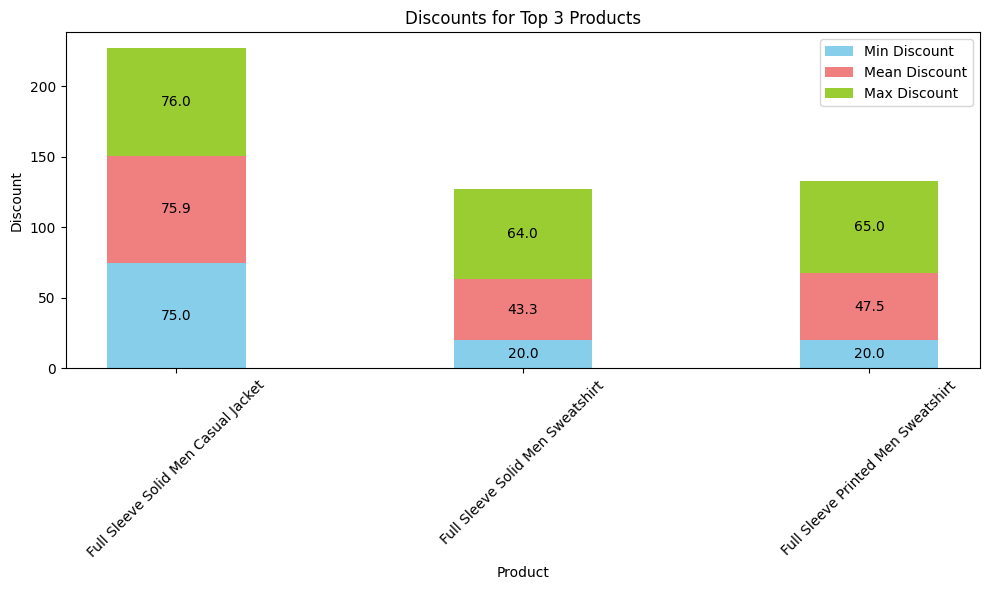

In [13]:

# Ambil 3 produk teratas
top_3_products = sorted_counts[:3]

# Buat list untuk menyimpan data diskon
brands = []
titles = []
min_discounts = []
mean_discounts = []
max_discounts = []

# Loop melalui 3 produk teratas
for (brand, title), _ in top_3_products:
    # Filter dataframe untuk produk tertentu
    df_product = df[(df['brand'] == brand) & (df['title'] == title)]

    # Hitung diskon minimum, rata-rata, dan maksimum
    min_discount = df_product['discount'].min()
    mean_discount = df_product['discount'].mean()
    max_discount = df_product['discount'].max()

    # Tambahkan data ke list
    brands.append(brand)
    titles.append(title)
    min_discounts.append(min_discount)
    mean_discounts.append(mean_discount)
    max_discounts.append(max_discount)

# Buat DataFrame dari data diskon
df_discounts = pd.DataFrame({
    'Brand': brands,
    'Title': titles,
    'Min Discount': min_discounts,
    'Mean Discount': mean_discounts,
    'Max Discount': max_discounts
})
df_discounts

import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan df_discounts sudah ada
df_discounts = pd.DataFrame({
    'Brand': brands,
    'Title': titles,
    'Min Discount': min_discounts,
    'Mean Discount': mean_discounts,
    'Max Discount': max_discounts
})

# Set ukuran plot
plt.figure(figsize=(10, 6))

# Plot stacked bar chart
bar_width = 0.4  # Lebar bar
index = range(len(df_discounts))

# Plot setiap bar untuk Min, Mean, Max Discount
plt.bar(index, df_discounts['Min Discount'], bar_width, label='Min Discount', color='skyblue')
plt.bar(index, df_discounts['Mean Discount'], bar_width, bottom=df_discounts['Min Discount'], label='Mean Discount', color='lightcoral')
plt.bar(index, df_discounts['Max Discount'], bar_width, bottom=df_discounts['Min Discount'] + df_discounts['Mean Discount'], label='Max Discount', color='yellowgreen')

# Menambahkan keterangan nilai di setiap bar
for i, (min_val, mean_val, max_val) in enumerate(zip(df_discounts['Min Discount'], df_discounts['Mean Discount'], df_discounts['Max Discount'])):
    plt.text(i, min_val / 2, f'{min_val:.1f}', ha='center', va='center', color='black')
    plt.text(i, min_val + mean_val / 2, f'{mean_val:.1f}', ha='center', va='center', color='black')
    plt.text(i, min_val + mean_val + max_val / 2, f'{max_val:.1f}', ha='center', va='center', color='black')

# Tambahkan label dan judul
plt.xlabel('Product')
plt.ylabel('Discount')
plt.title('Discounts for Top 3 Products')
plt.xticks(index, df_discounts['Title'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
# prompt: hubungkan diskondan selling price dari 3 produk diatas. dan satukan kedalam 1 df. buat itu hanya berisi nilai min mean dan max dari ketiga poduk

# Ambil 3 produk teratas
top_3_products = sorted_counts[:3]

# Buat list untuk menyimpan data
data = []

# Loop melalui 3 produk teratas
for (brand, title), _ in top_3_products:
    # Filter dataframe untuk produk tertentu
    df_product = df[(df['brand'] == brand) & (df['title'] == title)]

    # Hitung nilai min, mean, dan max untuk harga jual dan diskon
    min_price = df_product['selling_price'].min()
    mean_price = df_product['selling_price'].mean()
    max_price = df_product['selling_price'].max()

    min_discount = df_product['discount'].min()
    mean_discount = df_product['discount'].mean()
    max_discount = df_product['discount'].max()

    # Tambahkan data ke list
    data.append({
        'Brand': brand,
        'Title': title,
        'Min Price': min_price,
        'Mean Price': mean_price,
        'Max Price': max_price,
        'Min Discount': min_discount,
        'Mean Discount': mean_discount,
        'Max Discount': max_discount
    })

# Buat DataFrame dari data
df_combined = pd.DataFrame(data)

# Tampilkan DataFrame
df_combined


,Brand,Title,Min Price,Mean Price,Max Price,Min Discount,Mean Discount,Max Discount
0,JACK AND HAR,Full Sleeve Solid Men Casual Jacket,499.0,671.413793,699.0,75.0,75.862069,76.0
1,REEB,Full Sleeve Solid Men Sweatshirt,632.0,1439.255172,4500.0,20.0,43.255172,64.0
2,Pu,Full Sleeve Printed Men Sweatshirt,804.0,1859.642105,7799.0,20.0,47.515789,65.0


**Insights:**

- JACK AND HAR (Full Sleeve Solid Men Casual Jacket) Diskonnya berkisar antara 75% hingga 76%, dengan rata-rata 75.86%.

- REEB (Full Sleeve Solid Men Sweatshirt) Diskonnya berkisar antara 20% hingga 64%, dengan rata-rata 43.26%.

- Pu (Full Sleeve Printed Men Sweatshirt) Diskonnya berkisar antara 20% hingga 65%, dengan rata-rata 47.52%.

## Kesimpulan

| Brand        | Title                               |Harga (Rp) | Diskon (%) |
|--------------|-------------------------------------|------------------------|------------------------|
| JACK AND HAR | Full Sleeve Solid Men Casual Jacket | 675                    | 75                     |
| REEB         | Full Sleeve Solid Men Sweatshirt    | 1,400                  | 43                     |
| Pu           | Full Sleeve Printed Men Sweatshirt  | 1,860                  | 47                     |



Penjelasan:

- JACK AND HAR: harga diambil dari rata-rata harga yang ditawarkan (Mean Price) untuk menjaga daya tarik dan kesesuaian pasar. Diskon rekomendasi diambil dari diskon rata-rata tertinggi (Mean Discount) yang ditawarkan, untuk bersaing dengan harga pasar.

- REEB: Untuk sweatshirt ini, harga diambil dari rata-rata harga yang ditawarkan, dan diskon dari rata-rata diskon tertinggi, karena harga dan diskon cenderung lebih variatif.

- Pu: Rekomendasi harga menggunakan rata-rata harga, dan diskon menggunakan rata-rata diskon tertinggi untuk tetap kompetitif.

# Analisis lanjutan

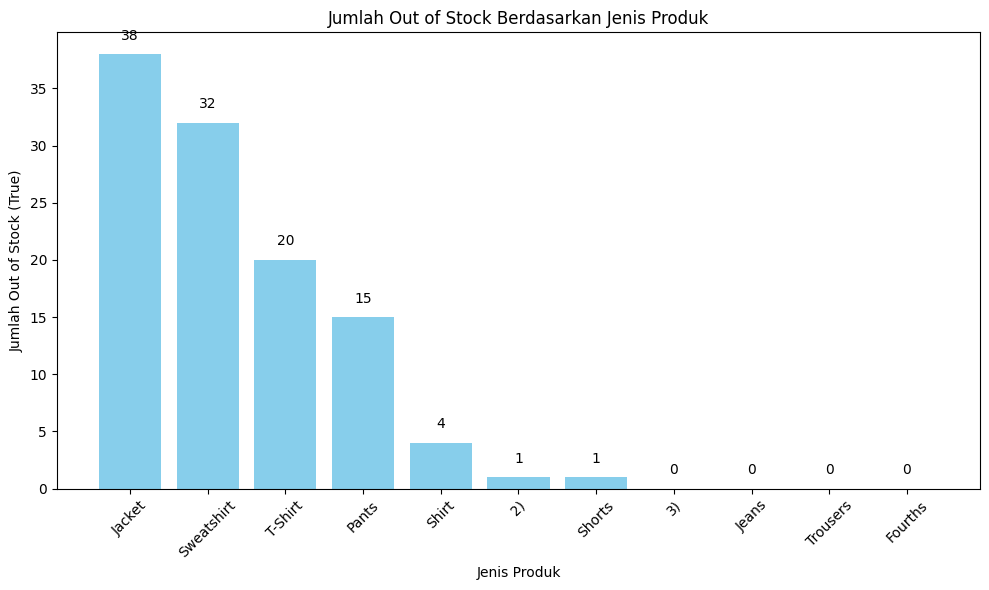

In [15]:
import matplotlib.pyplot as plt

# Data jenis produk dan jumlah out_of_stock
product_types = {}
for (brand, title), count in sorted_counts:
    product_type = title.split()[-1]  # Ambil kata terakhir dari judul
    if product_type not in product_types:
        product_types[product_type] = 0
    product_types[product_type] += count

# Urutkan jenis produk berdasarkan jumlah out_of_stock
sorted_product_types = sorted(product_types.items(), key=lambda x: x[1], reverse=True)
product_names = [item[0] for item in sorted_product_types]
out_of_stock_counts = [item[1] for item in sorted_product_types]

# Buat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(product_names, out_of_stock_counts, color='skyblue')

# Tambahkan keterangan nilai di setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', color='black')

# Tambahkan label dan judul
plt.xlabel('Jenis Produk')
plt.ylabel('Jumlah Out of Stock (True)')
plt.title('Jumlah Out of Stock Berdasarkan Jenis Produk')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Insights:**
- Produk yang paling laris ialah jenis ***Jacket***, ***Sweatshirt***, ***T-Shirt*** dan ***Pants***

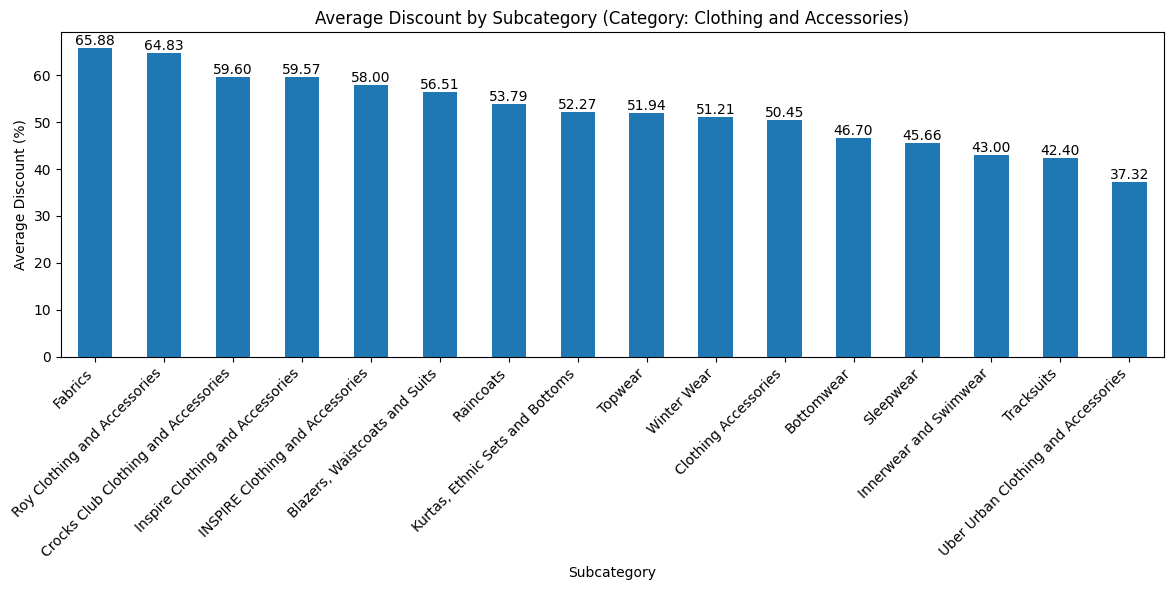

In [16]:
# Ensure 'discount' column is numeric and remove any non-numeric characters if necessary
df['discount'] = df['discount'].replace({'%': ''}, regex=True).astype(float)

# Filter data for the 'Clothing and Accessories' category
df_clothing = df[df['category'] == 'Clothing and Accessories']

# Group by subcategory and calculate the average discount
avg_discount_by_subcategory = df_clothing.groupby('sub_category')['discount'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = avg_discount_by_subcategory.plot(kind='bar')

# Add value labels on each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )

plt.title('Average Discount by Subcategory (Category: Clothing and Accessories)')
plt.xlabel('Subcategory')
plt.ylabel('Average Discount (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Insights:
- Berdasar pada penemuan sebelumnya, fokus kita adalah pada category clothing and accessories.
- rata-rata diskon tertinggi ialah category fabrics.
- rata-rata diskon produk dalam subcategory topwear ialah 51.79%, bottomwear 45.18%, winterwear 50.94%,inner sswim 39.83%,clothing accessories 53.75%, kurtas,ethnic ets & bottoms 48.82%

insights:
- kategori dengan penjualan terbanyak ialah pada clothing and accesoris dengan persentase 99,4% dari total seluruh penjualan.Sedang footware dengan penjualan hanya 0,6%

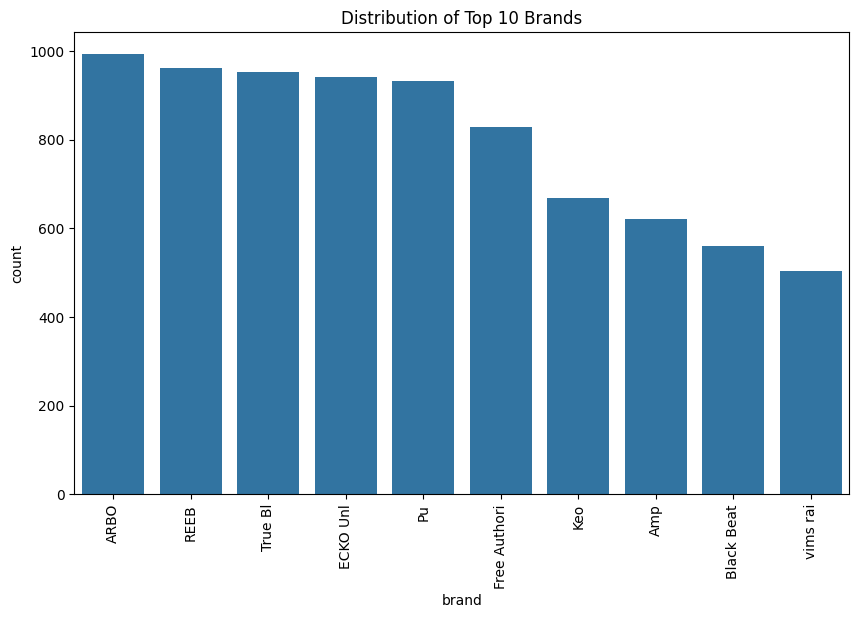

Brand counts for top 10 brands:
ARBO: 993
REEB: 961
True Bl: 952
ECKO Unl: 941
Pu: 933
Free Authori: 829
Keo: 668
Amp: 621
Black Beat: 560
vims rai: 504


In [17]:

# Filter brands with count > 400
brand_counts = df['brand'].value_counts()
top_10_brands = brand_counts.head(10).index

# Plot with counts
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df[df['brand'].isin(top_10_brands)], x='brand', order=top_10_brands)

plt.title('Distribution of Top 10 Brands')
plt.xticks(rotation=90)
plt.show()

# Print brand counts
print("Brand counts for top 10 brands:")
for brand in top_10_brands:
    print(f"{brand}: {brand_counts[brand]}")


Insights:

Brand yang paling banayk produknya ialah ARBO, PU, True BI, rEEBM ecko uni, free authori